In [1]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib
!pip install imutils

You should consider upgrading via the 'c:\users\21smt17\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\21smt17\anaconda3\python.exe -m pip install --upgrade pip' command.


In [158]:
#-*- coding:utf-8-*-
import imutils
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
from tqdm import tqdm

In [159]:
mp_holistic = mp.solutions.holistic #Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [160]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                   # Image is no longer writeable
    results = model.process(image)                  # Make prediction
    image.flags.writeable = True                    # Image is now writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # COLOR CONVERSION RGB 2 BGR
    return image, results

In [161]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [162]:
mp_holistic.POSE_CONNECTIONS

frozenset({(<PoseLandmark.NOSE: 0>, <PoseLandmark.LEFT_EYE_INNER: 1>),
           (<PoseLandmark.NOSE: 0>, <PoseLandmark.RIGHT_EYE_INNER: 4>),
           (<PoseLandmark.LEFT_EYE_INNER: 1>, <PoseLandmark.LEFT_EYE: 2>),
           (<PoseLandmark.LEFT_EYE: 2>, <PoseLandmark.LEFT_EYE_OUTER: 3>),
           (<PoseLandmark.LEFT_EYE_OUTER: 3>, <PoseLandmark.LEFT_EAR: 7>),
           (<PoseLandmark.RIGHT_EYE_INNER: 4>, <PoseLandmark.RIGHT_EYE: 5>),
           (<PoseLandmark.RIGHT_EYE: 5>, <PoseLandmark.RIGHT_EYE_OUTER: 6>),
           (<PoseLandmark.RIGHT_EYE_OUTER: 6>, <PoseLandmark.RIGHT_EAR: 8>),
           (<PoseLandmark.MOUTH_RIGHT: 10>, <PoseLandmark.MOUTH_LEFT: 9>),
           (<PoseLandmark.LEFT_SHOULDER: 11>, <PoseLandmark.LEFT_ELBOW: 13>),
           (<PoseLandmark.LEFT_SHOULDER: 11>, <PoseLandmark.LEFT_HIP: 23>),
           (<PoseLandmark.RIGHT_SHOULDER: 12>,
            <PoseLandmark.LEFT_SHOULDER: 11>),
           (<PoseLandmark.RIGHT_SHOULDER: 12>, <PoseLandmark.RIGHT_ELBOW: 14>)

In [163]:
def draw_styled_landmarks(image, results):
#     mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS,
#                              mp_drawing.DrawingSpec(color=(80,110,10), thickness=1,circle_radius=1),
#                              mp_drawing.DrawingSpec(color=(80,265,121), thickness=1,circle_radius=1)
#                              ) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2,circle_radius=4),
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2,circle_radius=2)) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2,circle_radius=4),
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2,circle_radius=2)) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(245,117,6), thickness=2,circle_radius=4),
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2,circle_radius=2))

In [243]:
import cv2
#cap = cv2.VideoCapture(0)
# for i in range(0,3):
#cap = cv2.VideoCapture("./img/NIA_SL_WORD2751_REAL01_F.mp4")
#cap = cv2.VideoCapture("./img/T1.mp4")
cap = cv2.VideoCapture(0)
# for i in range(0,2,1):
#     cap = cv2.VideoCapture("./img/KETI_SL_000000000"+"{}.avi".format(i + 2))
    
# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        
    
        # Read feed        
        ret, frame = cap.read()
        #frame = imutils.resize(frame, width=1200)
#         if not ret:
#             print("비디오 읽기 실패 / 비디오 모두 읽음")
#             cap.release()   # 비디오 읽기 종료
#             cv2.destroyAllWindows()  # 새로 연 창을 모두 닫아줌
#             break
        # Make detections(탐지들)
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)
        
        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [165]:
cap.release()
cv2.destroyAllWindows()

In [166]:
#results.left_hand_landmarks.landmark
len(results.right_hand_landmarks.landmark)

21

In [167]:
print(draw_landmarks(frame, results))

None


In [168]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [169]:
#test
#pose
#len(pose)
#pose = np.array([[res.x, res.y, res.z, res.visibility(저항)] for res in results.pose_landmarks.landmark])
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)                                                                                                   # 학습시킬려고 flatten으로 쫙 펴줌
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [170]:
def extract_keypoints(results):
   pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
#    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)                                                                                                   # 학습시킬려고 flatten으로 쫙 펴줌
   lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
   rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3) 
   return np.concatenate([pose, lh, rh])

In [171]:
# len(results.face_landmarks.landmark) * 3

In [172]:
lh

array([ 8.08125854e-01,  5.40025592e-01, -4.50552943e-05,  7.52455354e-01,
        5.32646835e-01, -1.57406777e-02,  7.05960691e-01,  4.90361959e-01,
       -1.65765285e-02,  6.76448405e-01,  4.48166609e-01, -1.99082140e-02,
        6.54818892e-01,  4.22528505e-01, -2.43419595e-02,  7.28661418e-01,
        3.95842224e-01,  1.74028501e-02,  7.00597763e-01,  3.41966987e-01,
        1.42917633e-02,  6.86158299e-01,  3.05638433e-01,  2.64515402e-03,
        6.74717903e-01,  2.74419010e-01, -6.80339895e-03,  7.58183300e-01,
        3.74393374e-01,  1.54629219e-02,  7.41603017e-01,  3.05452794e-01,
        2.30376255e-02,  7.31291413e-01,  2.62487739e-01,  8.57047178e-03,
        7.22843051e-01,  2.27114677e-01, -5.24758408e-03,  7.89001226e-01,
        3.70201379e-01,  9.14443564e-03,  7.79583871e-01,  3.02321672e-01,
        1.10208336e-02,  7.74019539e-01,  2.59396076e-01, -2.58157845e-03,
        7.67988980e-01,  2.23835886e-01, -1.45122753e-02,  8.21704984e-01,
        3.79508078e-01,  

In [173]:
rh

array([ 3.45299661e-01,  4.92744148e-01, -5.81131244e-05,  3.94613236e-01,
        4.83589470e-01, -1.76994838e-02,  4.37108815e-01,  4.39116865e-01,
       -2.19932236e-02,  4.60206151e-01,  3.94946814e-01, -2.79492699e-02,
        4.81048405e-01,  3.70156854e-01, -3.46168205e-02,  4.18695748e-01,
        3.43863428e-01,  4.08856897e-03,  4.43698764e-01,  2.92806268e-01,
       -8.67942814e-03,  4.57708031e-01,  2.60248095e-01, -1.77099202e-02,
        4.68971848e-01,  2.28647932e-01, -2.45547481e-02,  3.89231294e-01,
        3.24652642e-01,  6.15060213e-04,  4.05752182e-01,  2.60163665e-01,
       -6.49855752e-03,  4.15480286e-01,  2.18316168e-01, -1.63078234e-02,
        4.23249036e-01,  1.84334740e-01, -2.37000827e-02,  3.60041618e-01,
        3.22766989e-01, -8.92488193e-03,  3.68454337e-01,  2.60100543e-01,
       -2.03235596e-02,  3.74351770e-01,  2.18780845e-01, -3.41791734e-02,
        3.80941838e-01,  1.85380101e-01, -4.42902967e-02,  3.28759909e-01,
        3.36015433e-01, -

In [174]:
np.zeros(21*3)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [175]:
#extract_keypoints(results).shape
result_test = extract_keypoints(results)

In [176]:
result_test

array([ 5.48484266e-01,  3.80646020e-01, -9.88092124e-01,  9.99986291e-01,
        5.76777875e-01,  3.22629094e-01, -9.75140095e-01,  9.99919236e-01,
        5.96770823e-01,  3.24191988e-01, -9.74463761e-01,  9.99956906e-01,
        6.15792632e-01,  3.26288640e-01, -9.74455178e-01,  9.99911904e-01,
        5.21747351e-01,  3.26842636e-01, -9.33459401e-01,  9.99900043e-01,
        5.04797101e-01,  3.29394907e-01, -9.34593379e-01,  9.99947667e-01,
        4.88494217e-01,  3.31119090e-01, -9.34710145e-01,  9.99894202e-01,
        6.39024675e-01,  3.49791050e-01, -6.96067393e-01,  9.99976099e-01,
        4.71140683e-01,  3.54830950e-01, -5.27865052e-01,  9.99974489e-01,
        5.92635691e-01,  4.50100839e-01, -8.76324654e-01,  9.99938369e-01,
        5.12058735e-01,  4.51828212e-01, -8.24653149e-01,  9.99951839e-01,
        7.75140405e-01,  6.50508225e-01, -4.82877493e-01,  9.99692500e-01,
        3.84130061e-01,  6.45457029e-01, -2.31720001e-01,  9.99689341e-01,
        9.63231921e-01,  

In [177]:
468*3+33*4+21*3+21*3

1662

In [182]:
# 딥러닝 파일에 0.npy 파일 생김   test용
np.save('0', result_test) 

In [331]:
# path for exported data, numpy arrays
DATA_PATH = os.path.join('HandSign')

# Actions that we try to detect
#actions = np.array(['coco','love','HM'])
#actions = np.array(['T1','T2','T3','T4','T5','T6','T7','T8','T9','T10','T11','T12'])
#actions = np.array(['감사합니다','귀여워요','괜찮아요','미안합니다','기다려요'])
actions = np.array(['감사합니다','귀여워요','괜찮아요','미안합니다','즐겁다','평화','화장실','여기','병원','배고프다'])
# Thirty videos worth of data
no_sequences =  20#60#10      #29 , 16, 5

# videos are going to be 30 frames in length
sequence_length = 50#40#50    #30, 20, 100

In [332]:
# 폴더 세개 생성!! 딥러닝 -> 안녕, 나는, 아가형민 순서대로 생김
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except :
            pass

In [335]:
cap=cv2.VideoCapture(0)    
    # Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
#     for action in actions:        
    # New Loop
    # Loop through actions
        

        # Loop through sequences aka videos

#    for action in actions:
        for i in range(0,20,1):        
            for frame_num in range(sequence_length):                

                # read feed
                ret, frame = cap.read()
                #frame = imutils.resize(frame, width=800)
                # Make detections
                image, results = mediapipe_detection(frame, holistic)
    #                print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)

                # New Apply wait logic
                if frame_num == 0:
                    cv2.putText(image, 'STRATING COLLECTION', (120,200),
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number{} f_num{}'.format('평화', i,frame_num), (15,12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                        # show to screen

                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(1500) # 1000

                else : 
                    cv2.putText(image, 'Collecting frames for {} Video Number{} f_num{}'.format('평화', i, frame_num), (15,12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                        # show to screen
                    cv2.imshow('OpenCV Feed', image)

                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, '평화', str(i), str(frame_num))
                np.save(npy_path, keypoints)
                #count = count+1
    #                # 중간에 파일이 없어도 끊기지 않게
    #                for i in range(0,sequence_length):
    #                    if os.path.isfile('C:/Users/21SMT37/3차 프젝/MP_Data/3차/8/{}.npy'.format(i)):
    #                        pass
    #                    else : 
    #                        continue

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
#         cap.release()
#         cv2.destroyAllWindows()
cap.release()
cv2.destroyAllWindows()

In [336]:
cap.release()
cv2.destroyAllWindows()

In [337]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [338]:
from PIL import ImageFont, ImageDraw, Image

In [339]:
label_map = {label:num for num, label in enumerate(actions)}

In [340]:
label_map

{'감사합니다': 0,
 '귀여워요': 1,
 '괜찮아요': 2,
 '미안합니다': 3,
 '즐겁다': 4,
 '평화': 5,
 '화장실': 6,
 '여기': 7,
 '병원': 8,
 '배고프다': 9}

In [341]:
frame_num

49

In [342]:
sequences, labels = [], []
for action in actions :
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence),"{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [343]:
X = np.array(sequences)

In [344]:
y = to_categorical(labels).astype(int)

In [345]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2)

In [346]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, SimpleRNN, Dropout, TimeDistributed, Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

In [347]:
log_dir = os.path.join("Hand_word")
tb_callback = TensorBoard(log_dir=log_dir)

In [348]:
X.shape

(200, 50, 258)

In [349]:
md = Sequential()
md.add(LSTM(128, return_sequences=True, activation='tanh', input_shape=(50,258)))
md.add(LSTM(64, return_sequences=True, activation='tanh'))
md.add(LSTM(32, return_sequences=False, activation='tanh'))
md.add(Dense(64, activation='tanh'))
md.add(Dense(32, activation='tanh'))
md.add(Dense(actions.shape[0], activation='softmax'))

In [350]:
X_train.shape, y_train.shape

((160, 50, 258), (160, 10))

In [351]:
#Adam(lr=0.0001)    #categorical_crossentropy : 이진 교차 엔트로피
md.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy',
           metrics=['categorical_accuracy']) # categorical_accuracy

In [352]:
h = md.fit(X_train, y_train, batch_size=128,
         epochs = 350, callbacks=[tb_callback]) # tensorboard_callback

Epoch 1/350
2/2 [==============================] - 3s 663ms/step - loss: 2.3016 - categorical_accuracy: 0.1099
Epoch 2/350
2/2 [==============================] - 0s 67ms/step - loss: 2.2649 - categorical_accuracy: 0.1047
Epoch 3/350
2/2 [==============================] - 0s 66ms/step - loss: 2.2291 - categorical_accuracy: 0.2255
Epoch 4/350
2/2 [==============================] - 0s 67ms/step - loss: 2.1879 - categorical_accuracy: 0.2240
Epoch 5/350
2/2 [==============================] - 0s 68ms/step - loss: 2.1576 - categorical_accuracy: 0.2214
Epoch 6/350
2/2 [==============================] - 0s 67ms/step - loss: 2.1251 - categorical_accuracy: 0.2203
Epoch 7/350
2/2 [==============================] - 0s 68ms/step - loss: 2.0926 - categorical_accuracy: 0.2771
Epoch 8/350
2/2 [==============================] - 0s 68ms/step - loss: 2.0591 - categorical_accuracy: 0.3385
Epoch 9/350
2/2 [==============================] - 0s 67ms/step - loss: 2.0288 - categorical_accuracy: 0.4010
Epoch 10/

2/2 [==============================] - 0s 70ms/step - loss: 0.6145 - categorical_accuracy: 1.0000
Epoch 75/350
2/2 [==============================] - 0s 68ms/step - loss: 0.6061 - categorical_accuracy: 1.0000
Epoch 76/350
2/2 [==============================] - 0s 69ms/step - loss: 0.5932 - categorical_accuracy: 1.0000
Epoch 77/350
2/2 [==============================] - 0s 69ms/step - loss: 0.5864 - categorical_accuracy: 1.0000
Epoch 78/350
2/2 [==============================] - 0s 69ms/step - loss: 0.5712 - categorical_accuracy: 1.0000
Epoch 79/350
2/2 [==============================] - 0s 68ms/step - loss: 0.5610 - categorical_accuracy: 1.0000
Epoch 80/350
2/2 [==============================] - 0s 68ms/step - loss: 0.5531 - categorical_accuracy: 1.0000
Epoch 81/350
2/2 [==============================] - 0s 72ms/step - loss: 0.5430 - categorical_accuracy: 1.0000
Epoch 82/350
2/2 [==============================] - 0s 70ms/step - loss: 0.5349 - categorical_accuracy: 1.0000
Epoch 83/350
2

2/2 [==============================] - 0s 72ms/step - loss: 0.2272 - categorical_accuracy: 1.0000
Epoch 148/350
2/2 [==============================] - 0s 74ms/step - loss: 0.2255 - categorical_accuracy: 1.0000
Epoch 149/350
2/2 [==============================] - 0s 68ms/step - loss: 0.2221 - categorical_accuracy: 1.0000
Epoch 150/350
2/2 [==============================] - 0s 68ms/step - loss: 0.2207 - categorical_accuracy: 1.0000
Epoch 151/350
2/2 [==============================] - 0s 69ms/step - loss: 0.2189 - categorical_accuracy: 1.0000
Epoch 152/350
2/2 [==============================] - 0s 68ms/step - loss: 0.2160 - categorical_accuracy: 1.0000
Epoch 153/350
2/2 [==============================] - 0s 69ms/step - loss: 0.2129 - categorical_accuracy: 1.0000
Epoch 154/350
2/2 [==============================] - 0s 69ms/step - loss: 0.2122 - categorical_accuracy: 1.0000
Epoch 155/350
2/2 [==============================] - 0s 70ms/step - loss: 0.2095 - categorical_accuracy: 1.0000
Epoch 

2/2 [==============================] - 0s 70ms/step - loss: 0.1244 - categorical_accuracy: 1.0000
Epoch 221/350
2/2 [==============================] - 0s 66ms/step - loss: 0.1217 - categorical_accuracy: 1.0000
Epoch 222/350
2/2 [==============================] - 0s 71ms/step - loss: 0.1219 - categorical_accuracy: 1.0000
Epoch 223/350
2/2 [==============================] - 0s 74ms/step - loss: 0.1207 - categorical_accuracy: 1.0000
Epoch 224/350
2/2 [==============================] - 0s 75ms/step - loss: 0.1208 - categorical_accuracy: 1.0000
Epoch 225/350
2/2 [==============================] - 0s 70ms/step - loss: 0.1192 - categorical_accuracy: 1.0000
Epoch 226/350
2/2 [==============================] - 0s 69ms/step - loss: 0.1190 - categorical_accuracy: 1.0000
Epoch 227/350
2/2 [==============================] - 0s 73ms/step - loss: 0.1180 - categorical_accuracy: 1.0000
Epoch 228/350
2/2 [==============================] - 0s 69ms/step - loss: 0.1167 - categorical_accuracy: 1.0000
Epoch 

2/2 [==============================] - 0s 75ms/step - loss: 0.0810 - categorical_accuracy: 1.0000
Epoch 294/350
2/2 [==============================] - 0s 71ms/step - loss: 0.0812 - categorical_accuracy: 1.0000
Epoch 295/350
2/2 [==============================] - 0s 70ms/step - loss: 0.0801 - categorical_accuracy: 1.0000
Epoch 296/350
2/2 [==============================] - 0s 69ms/step - loss: 0.0800 - categorical_accuracy: 1.0000
Epoch 297/350
2/2 [==============================] - 0s 70ms/step - loss: 0.0790 - categorical_accuracy: 1.0000
Epoch 298/350
2/2 [==============================] - 0s 72ms/step - loss: 0.0794 - categorical_accuracy: 1.0000
Epoch 299/350
2/2 [==============================] - 0s 71ms/step - loss: 0.0783 - categorical_accuracy: 1.0000
Epoch 300/350
2/2 [==============================] - 0s 71ms/step - loss: 0.0787 - categorical_accuracy: 1.0000
Epoch 301/350
2/2 [==============================] - 0s 67ms/step - loss: 0.0781 - categorical_accuracy: 1.0000
Epoch 

In [353]:
md.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 50, 128)           198144    
_________________________________________________________________
lstm_13 (LSTM)               (None, 50, 64)            49408     
_________________________________________________________________
lstm_14 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dense_12 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_13 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_14 (Dense)             (None, 10)                330       
Total params: 264,490
Trainable params: 264,490
Non-trainable params: 0
________________________________________________

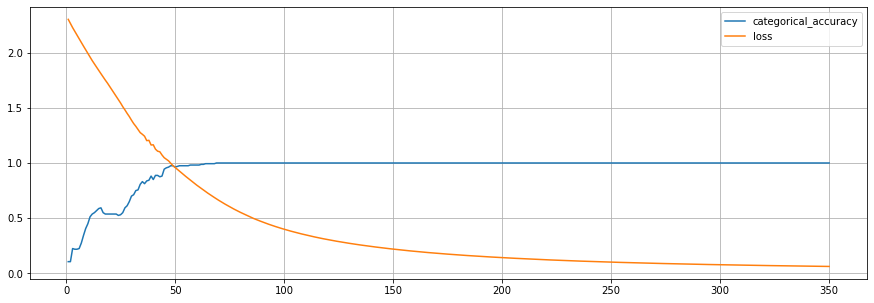

In [354]:
# 시각화
plt.figure(figsize=(15, 5))

plt.plot(range(1, 351, 1),
         h.history['categorical_accuracy'],
         label='categorical_accuracy'
         )

plt.plot(range(1, 351, 1),
         h.history['loss'],
         label='loss'
         )
plt.grid()
plt.legend()
plt.show()

In [355]:
res = md.predict(X_test)

In [356]:
for i in range(0,len(actions)):
    actions[np.argmax(res[i])]
    actions[np.argmax(y_test[i])]
    print(actions[np.argmax(res[i])])
    print(actions[np.argmax(y_test[i])])
    print("==============================")

여기
여기
화장실
화장실
평화
평화
평화
평화
미안합니다
미안합니다
감사합니다
감사합니다
괜찮아요
괜찮아요
병원
병원
귀여워요
귀여워요
화장실
화장실


In [357]:
# len(actions)

In [358]:
# actions[np.argmax(res[4])]

In [359]:
# actions[np.argmax(y_test[8])]

In [360]:
md.save('HandSign1_word.h5')  # 모델 저장

In [361]:
#md.load_weights('Test1.h5')  # 모델 저장

In [362]:
from sklearn.metrics import multilabel_confusion_matrix,accuracy_score 

In [363]:
yhat = md.predict(X_train)

In [364]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [365]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[145,   0],
        [  0,  15]],

       [[144,   0],
        [  0,  16]],

       [[144,   0],
        [  0,  16]],

       [[143,   0],
        [  0,  17]],

       [[141,   0],
        [  0,  19]],

       [[144,   0],
        [  0,  16]],

       [[148,   0],
        [  0,  12]],

       [[144,   0],
        [  0,  16]],

       [[144,   0],
        [  0,  16]],

       [[143,   0],
        [  0,  17]]], dtype=int64)

In [366]:
accuracy_score(ytrue, yhat)

1.0

In [367]:
md.evaluate(X_test, y_test)

2/2 [==============================] - 1s 18ms/step - loss: 0.0682 - categorical_accuracy: 1.0000


[0.06816248595714569, 1.0]

In [368]:
colors = [(245,117,16),(117,245,16),(16,117,245),(245,117,16),(117,245,16),(16,117,245),(245,117,16),(117,245,16),
          (16,117,245),(245,117,16)]
#colors = [(245,117,16),(117,245,16),(16,117,245),(245,117,16),(117,245,16)]
# ,(245,117,16),(117,245,16),(16,117,245),(245,117,16)
#          ,(117,245,16),(16,117,245),(245,117,16),(117,245,16),(16,117,245)
def prob_viz(res,actions,input_frame,colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40),(int(prob*100),90+num*40),colors[num],-1)
        cv2.putText(output_frame, actions[num],(0,85+num*40),cv2.FONT_HERSHEY_SIMPLEX,1,
                    (255,255,255),2,cv2.LINE_AA)
        
    return output_frame

In [369]:
# # -*- coding : utf-8 -*-
# import sys
# print(sys.getdefaultencoding())

In [395]:
# -*- coding : utf-8 -*-
import cv2
from PIL import ImageFont, ImageDraw, Image  # 한글 출력 임포트
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.7
predictions = []

def most_frequent(data):
    return max(data, key=data.count)
cnt = 0
result_actions = 0

#word=['감사합니다','귀여워요','괜찮아요','미안합니다','기다려요']
b,g,r,a = 0,0,0,10
fontpath = "fonts/gulim.ttc"
font = ImageFont.truetype(fontpath, 40)

cap = cv2.VideoCapture("./img/Here.mp4")
#cap = cv2.VideoCapture(0)
# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:   
    while cap.isOpened():
    
        # read feed
        
        ret, frame = cap.read()
        frame = imutils.resize(frame, width=800)
        if not ret:
            #print("비디오 읽기 실패 / 비디오 모두 읽음")
            print("Finish")
            cap.release()   # 비디오 읽기 종료
            cv2.destroyAllWindows()  # 새로 연 창을 모두 닫아줌
            break
            
        # Make detections
        image, results = mediapipe_detection(frame,holistic)
#         print(results)
        
#        image = Image.fromarray(image)
#        draw = ImageDraw.Draw(image)
#        draw.text(xy=(10,15), text=actions[np.argmax(res)], font=font, fill=(255,255,255))
        image=np.array(image)
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        img_pil = Image.fromarray(image)
        draw = ImageDraw.Draw(img_pil)
        
        #2. Prediction logic
        keypoints = extract_keypoints(results)
#        sequence.insert(0,keypoints)
#        sequence = sequence[:30]
        sequence.append(keypoints)
#        sequence = sequence[-40:]
        
#        label = actions[np.argmax(res)]
        if len(sequence) == 50 :  # 30 프레임 
                 #np.expand_dims : (s_num,50,1662)을 캡슐화
            res = md.predict(np.expand_dims(sequence, axis=0))[0]            
            #print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            sequence = []
        
# # # #         # 3. Viz logic
#         if np.unique(predictions[:10]) ==np.argmax(res): 
        
#         if res[np.argmax(res)] > threshold: # 정확도                
#             if len(sentence) > 0:
#                 if actions[np.argmax(res)] != sentence[-1]:
#                     sentence.append(actions[np.argmax(res)])
# #                     print(actions[np.argmax(res)])
#             else :                               
#                 sentence.append(actions[np.argmax(res)])

#         if len(sentence) > 2 : #화면출력 글자 수
#             sentence = sentence[-2:]
#                 #draw.text(xy=(10,15), text=sentence, font=font, fill=(255,255,255))
#              # VIz probabilities
# #        image = prob_viz(res, actions, image, colors)
#               draw.text(xy=(10,15), text=actions[np.argmax(res)], font=font, fill=(255,255,255))

#         cv2.rectangle(image, (0,0), (640,40), (245, 117, 16), -1)
#         if sentence != [] :                        
#             cv2.putText(image, sentence, (3,30),
#                         cv2.FONT_HERSHEY_SIMPLEX,1, (255,255,255), 2, cv2.LINE_AA)
            
#         if result_actions == label:            
#             cnt += 1
# #         elif result_actions != label:
# #             cnt = 0
        
#         result_actions = "귀여워요"
#         if cnt >= 15:
#             #print(result_actions)
        draw.text((10, 10), actions[np.argmax(res)] , font=font, fill=(b,g,r,a))
        image = np.array(img_pil)
            
        
        # show to screen
        cv2.imshow('OpenCV Feed', image)
        
        # Break gracefully
        if cv2.waitKey(10) == 27:
            break
            
        
    #print(actions[np.argmax(res)])
#     def most_frequent(data):
#         count_list=[]

#         for x in data: 
#             count_list.append(data.count(x))
 
#         return data[count_list.index(max(count_list))]

#     print(most_frequent(sequence))
    print(actions[np.argmax(res)])
    cap.release()
    cv2.destroyAllWindows()
#     print(most_frequent(sentence))

여기


In [389]:
cap.release()
cv2.destroyAllWindows()

In [ ]:
# 1. New detection variables
sequence = []
sentence = []
predictions=[]
threshold = 0.6

# cap = cv2.VideoCapture(0)
# cap = cv2.VideoCapture("D:\\aihub\\수어 영상\\1.Training\\[원천]01_real_word_video\\01\\NIA_SL_WORD1504_REAL01_F.mp4")
# cap = cv2.VideoCapture("C:\\Users\\21SMT41\\Desktop\\deep_ex\\eeee\\NIA_SL_WORD1505_REAL01_R.mp4")
cap = cv2.VideoCapture("C:\\Users\\21SMT41\\Desktop\\web_video\\cocohappy.mp4")

cv2.waitKey(3000)
# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:   
    while cap.isOpened():
        
        # read feed
        
        ret, frame = cap.read()
        if not ret:
            print("비디오 읽기 실패 / 비디오 모두 읽음")
            cap.release()   # 비디오 읽기 종료
            cv2.destroyAllWindows()  # 새로 연 창을 모두 닫아줌
            break
            
        # Make detections
        image, results = mediapipe_detection(frame,holistic)
#         print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        #2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#        sequence = sequence[:30]
        sequence.append(keypoints)
#         sequence = sequence[-50:]
        
        if len(sequence) == 100 :
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            sentence = actions[np.argmax(res)]
            sequence=[]
#             predictions.append(np.argmax(res))
           
           
        # 3. Viz logic
#         if np.unique(predictions[-10:])==np.argmax(res):
          
        
#         if res[np.argmax(res)] > threshold:
#             if len(sentence) > 0:
#                 if actions[np.argmax(res)] != sentence[-1]:
#                     sentence.append(actions[np.argmax(res)])
#             else : 
#                 sentence.append(actions[np.argmax(res)])
            
#         if len(sentence) >3 :
#             sentence = sentence[-3:]
               
#         # VIz probabilities
#         image = prob_viz(res, actions, image, colors)
        cv2.rectangle(image, (0,0), (640,40), (245, 117, 16), -1)
        if sentence != [] :
            
            cv2.putText(image, sentence, (3,30),
                      cv2.FONT_HERSHEY_SIMPLEX,1, (255,255,255), 2, cv2.LINE_AA)
                 
        
#         

        # show to screen
        cv2.imshow('OpenCV Feed', image)
        
        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()
# print(sentence)

In [134]:
# # -*- coding : utf-8 -*-
# import cv2
# from PIL import ImageFont, ImageDraw, Image  # 한글 출력 임포트
# # 1. New detection variables
# sequence = []
# sentence = []
# threshold = 0.7
# predictions = []

# def most_frequent(data):
#     return max(data, key=data.count)
# cnt = 0
# result_actions = 0

# word=['감사합니다','귀여워요','괜찮아요','미안합니다','기다려요']
# b,g,r,a = 0,0,0,10
# fontpath = "fonts/gulim.ttc"
# font = ImageFont.truetype(fontpath, 40)

# cap = cv2.VideoCapture("./img/A2.mp4")
# #cap = cv2.VideoCapture(0)
# # Set mediapipe model
# with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:   
#     while cap.isOpened():
    
#         # read feed
        
#         ret, frame = cap.read()
#         frame = imutils.resize(frame, width=800)
#         if not ret:
#             #print("비디오 읽기 실패 / 비디오 모두 읽음")
#             print("Finish")
#             cap.release()   # 비디오 읽기 종료
#             cv2.destroyAllWindows()  # 새로 연 창을 모두 닫아줌
#             break
            
#         # Make detections
#         image, results = mediapipe_detection(frame,holistic)
#         print(results)
        
# #         image = Image.fromarray(image)
# #         draw = ImageDraw.Draw(image)
# #         draw.text(xy=(10,15), text=actions[np.argmax(res)], font=font, fill=(255,255,255))
# #         image=np.array(image)
#         # Draw landmarks
#         draw_styled_landmarks(image, results)
        
#         img_pil = Image.fromarray(image)
#         draw = ImageDraw.Draw(img_pil)
#         #label = actions[np.argmax(res)]
        
#         #2. Prediction logic
#         keypoints = extract_keypoints(results)
# #        sequence.insert(0,keypoints)
# #        sequence = sequence[:30]
#         sequence.append(keypoints)
# #        sequence = sequence[-100:]
        
        
#         if len(sequence) == 100 :  # 30 프레임 
#                  #np.expand_dims : (s_num,50,1662)을 캡슐화
#             res = md.predict(np.expand_dims(sequence, axis=0))[0]            
#             print(actions[np.argmax(res)])
#             predictions.append(np.argmax(res))
        
# # # #         # 3. Viz logic
# #        if np.unique(predictions[:10]) ==np.argmax(res): 
        
# #         if res[np.argmax(res)] > threshold: # 정확도                
# #             if len(sentence) > 0:
# #                 if actions[np.argmax(res)] != sentence[-1]:
# #                     sentence.append(actions[np.argmax(res)])
# #                     print(actions[np.argmax(res)])
# #             else :                               
# #                 sentence.append(actions[np.argmax(res)])

# #         if len(sentence) > 2 : #화면출력 글자 수
# #             sentence = sentence[-2:]
# #                 #draw.text(xy=(10,15), text=sentence, font=font, fill=(255,255,255))
# #     #         # VIz probabilities
# # #        image = prob_viz(res, actions, image, colors)
# #     #         draw.text(xy=(10,15), text=actions[np.argmax(res)], font=font, fill=(255,255,255))  
#         cv2.rectangle(image, (0,0), (640,40), (245, 117, 16), -1)
# #         cv2.putText(image, ' '.join(sentence), (3,30),
# #                     cv2.FONT_HERSHEY_SIMPLEX,1, (255,255,255), 2, cv2.LINE_AA)
# #         if result_actions == label:            
# #             cnt += 1
# # #         elif result_actions != label:
# # #             cnt = 0
        
# #         result_actions = "귀여워요"
# #         if cnt >= 15:
# #             #print(result_actions)
# #             draw.text((10, 10), actions[np.argmax(res)] , font=font, fill=(b,g,r,a))
# #             image = np.array(img_pil)
            
        
#         # show to screen
#         cv2.imshow('OpenCV Feed', image)
        
#         # Break gracefully
#         if cv2.waitKey(10) == 27:
#             break
            
        
#     #print(actions[np.argmax(res)])
# #     def most_frequent(data):
# #         count_list=[]

# #         for x in data: 
# #             count_list.append(data.count(x))
 
# #         return data[count_list.index(max(count_list))]

# #     print(most_frequent(sequence))
#     cap.release()
#     cv2.destroyAllWindows()
# #    print(most_frequent(sentence))

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
손이 너무 아파요
<class 'mediapipe.python.solution_base.SolutionOutputs'>
손이 너무 아파요
<class 'mediapipe.python.solution_base.SolutionOutputs'>
손이 너무 아파요
<class 'mediapipe.python.solution_base.SolutionOutputs'>
손이 너무 아파요
<class 'mediapipe.python.solution_base.SolutionOutputs'>
손이 너무 아파요
<class 'mediapipe.python.solution_base.SolutionOutputs'>
손이 너무 아파요
<class 'mediapipe.python.solution_base.SolutionOutputs'>
손이 너무 아파요
<class 'mediapipe.python.solution_base.SolutionOutputs'>
손이 너무 아파요
<class 'mediapipe.python.solution_base.SolutionOutputs'>
손이 너무 아파요
<class 'mediapipe.python.solution_base.SolutionOutputs'>
손이 너무 아파요
<class 'mediapipe.python.solution_base.SolutionOutputs'>
손이 너무 아파요
<class 'mediapipe.python.solution_base.SolutionOutputs'>
손이 너무 아파요
<class 'mediapipe.python.solution_base.SolutionOutputs'>
손이 너무 아파요
<class 'mediapipe.python.solution_base.SolutionOutputs'>
손이 너무 아파요
<class 'mediapipe.python.solution_base.SolutionOutputs'>
손이 너무

손이 너무 아파요
<class 'mediapipe.python.solution_base.SolutionOutputs'>
손이 너무 아파요
<class 'mediapipe.python.solution_base.SolutionOutputs'>
손이 너무 아파요
<class 'mediapipe.python.solution_base.SolutionOutputs'>
손이 너무 아파요
<class 'mediapipe.python.solution_base.SolutionOutputs'>
손이 너무 아파요
<class 'mediapipe.python.solution_base.SolutionOutputs'>
손이 너무 아파요
<class 'mediapipe.python.solution_base.SolutionOutputs'>
손이 너무 아파요
<class 'mediapipe.python.solution_base.SolutionOutputs'>
손이 너무 아파요
<class 'mediapipe.python.solution_base.SolutionOutputs'>
손이 너무 아파요


In [132]:
cap.release()
cv2.destroyAllWindows()

In [ ]:
actions[np.argmax(res)]

In [ ]:
md.predict(np.expand_dims(sequence, axis=0)[0])

In [ ]:
np.expand_dims(sequence, axis=0)[0]

In [ ]:
from flask import Flask
from flask import request, redirect

app = Flask(__name__) 

@app.route('/', methods=['GET','POST']) #/wondu
def index():   #wondu  
       
    if request.method == 'GET':
#         cf1 = str(request.args['chk_info1'])
#         cf2 = str(request.args['chk_info2'])
#         cf3 = int(request.args['chk_info3'])
       
        #df.iloc[list(similar_indexes)].sort_values('랭킹', ascending=True)[:top_n]
#         similar_wondu = find_sim_wondu(wondu, wondu_sim_sorted_ind, cf1,cf2,cf3,3) # 견과류향, 시티로스팅 , 바디감(2)에 가까운걸 5개뽑아줘!!
#         coffee=similar_wondu['원두이름']
#         print(cf1, cf2, cf3)

        # result = model() = request.args['num1']
        
        
    else:
#         cf1 = str(request.form['chk_info1'])
#         cf2 = str(request.form['chk_info2'])
#         cf3 = int(request.form['chk_info3'])
#         print(cf1, cf2, cf3)
        #df.iloc[list(similar_indexes)].sort_values('랭킹', ascending=True)[:top_n]
#         similar_wondu = find_sim_wondu(wondu, wondu_sim_sorted_ind, cf1,cf2,cf3,3) # 견과류향, 시티로스팅 , 바디감(2)에 가까운걸 5개뽑아줘!!
#         coffee=similar_wondu['원두이름']
        #similar_wondu = find_sim_wondu(wondu, wondu_sim_sorted_ind, 'cf1','cf2',cf3,1) # 견과류향, 시티로스팅 , 바디감(2)에 가까운걸 5개뽑아줘!!
        #coffee=similar_wondu[['원두이름']]
     print('기모링')  
    #print(len(coffee.values))
    url = 'http://localhost:8081/muscle/musclevideo.do?result='+ #coffee.values[0]
    return redirect(url)

if __name__ == '__main__':
    app.config['JSON_AS_ASCII'] = False
    app.run(host='127.0.0.1', port='5002') 